# EXAMEN FINAL DE IA 2021-0

# INTEGRANTES:
## -SALGUERO CONTRERAS GINO ESAUL ------------ 17200303
## -VASQUEZ MELGAREJO JHONATAN ----------------- 17200306
## -VILLEGAS DAUNEY GIANPIERRE ALEXIS --------- 17200311

## Importar librerias

** Importe las librerias que generalmente usa para el análisis de datos. **

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Obtener los datos

In [2]:
df_cov = pd.read_excel('BD_coronavirus.xlsx')

Revisamos las primeras filas del dataset, así como algunas estadisticas e información acerca de las columnas.

In [3]:
df_cov.head()

,id,edad,sexo,fecha_ini,hospitalizado,evolucion,fiebre,malestar,tos,garganta,...,inmunodeficiencia,renal,hepatico,pulmonar,cancer,otros_comorbilidad,fecha_mue,muestra,prueba,resultado
0,1,40,MASCULINO,17-04-2020,NO,NaN,0,1,1,1,...,0,0,0,0,0,NaN,00-00-0000,NaN,NaN,NaN
1,539,18,FEMENINO,04-09-2020,NO,NaN,1,1,1,0,...,0,0,0,0,0,NaN,10-03-2020,HISOPADO NASAL Y FARINGEO,NaN,NaN
2,681,45,MASCULINO,02-03-2020,SI,RECUPERADO,0,1,0,0,...,0,0,0,0,0,NaN,04-03-2020,HISOPADO NASAL Y FARINGEO,PCR-RT,NEGATIVO
3,692,69,MASCULINO,02-03-2020,NO,RECUPERADO,1,1,1,0,...,0,0,0,0,0,asma,12-03-2020,HISOPADO NASAL Y FARINGEO,NaN,NaN
4,696,67,FEMENINO,10-03-2020,NO,DESCONOCIDO,1,1,1,0,...,0,0,0,0,0,NaN,12-03-2020,HISOPADO NASAL Y FARINGEO,PCR,NEGATIVO


In [4]:
df_cov.describe()

,id,edad,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,...,postparto,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer
count,9.377400e+04,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,...,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000,93774.000000
mean,1.272521e+06,40.055847,0.162966,0.192409,0.259134,0.254068,0.107578,0.080235,0.057244,0.038678,...,0.000821,0.015815,0.014791,0.001290,0.001024,0.000821,0.002986,0.000395,0.002698,0.003125
std,8.312877e+05,16.947560,0.369337,0.394195,0.438161,0.435339,0.309848,0.271659,0.232310,0.192828,...,0.028644,0.124758,0.120716,0.035898,0.031980,0.028644,0.054562,0.019860,0.051872,0.055810
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.310875e+05,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.142626e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.058179e+06,51.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.775205e+06,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93774 entries, 0 to 93773
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  93774 non-null  int64 
 1   edad                93774 non-null  int64 
 2   sexo                93774 non-null  object
 3   fecha_ini           93774 non-null  object
 4   hospitalizado       93774 non-null  object
 5   evolucion           10054 non-null  object
 6   fiebre              93774 non-null  int64 
 7   malestar            93774 non-null  int64 
 8   tos                 93774 non-null  int64 
 9   garganta            93774 non-null  int64 
 10  congestion          93774 non-null  int64 
 11  respiratoria        93774 non-null  int64 
 12  diarrea             93774 non-null  int64 
 13  nauseas             93774 non-null  int64 
 14  cefalea             93774 non-null  int64 
 15  irritabilidad       93774 non-null  int64 
 16  muscular            93

In [6]:
df_cov.columns

Index(['id', 'edad', 'sexo', 'fecha_ini', 'hospitalizado', 'evolucion',
       'fiebre', 'malestar', 'tos', 'garganta', 'congestion', 'respiratoria',
       'diarrea', 'nauseas', 'cefalea', 'irritabilidad', 'muscular',
       'abdominal', 'pecho', 'articulaciones', 'otros_sintomas', 'temperatura',
       'exudado', 'conjuntival', 'convulsion', 'coma', 'disnea',
       'auscultacion', 'rxpulmonar', 'otros_signos', 'embarazo', 'trimestre',
       'postparto', 'cardiovascular', 'diabetes', 'hepatica', 'neurologica',
       'inmunodeficiencia', 'renal', 'hepatico', 'pulmonar', 'cancer',
       'otros_comorbilidad', 'fecha_mue', 'muestra', 'prueba', 'resultado'],
      dtype='object')

# Análisis exploratorio de datos

Hacemos un análisis de datos exploratorio, ¡Comenzaremos por verificar los datos que faltan!

## Datos perdidos

¡Podemos usar Seaborn para crear un mapa de calor simple para ver dónde nos faltan datos!

<AxesSubplot:>

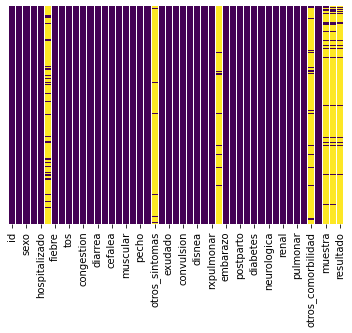

In [7]:
sns.heatmap(df_cov.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Usamos un countplot para ver como está la proporción de los resultados negativos con los positivos

<AxesSubplot:xlabel='resultado', ylabel='count'>

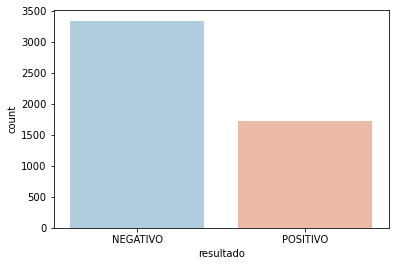

In [8]:
sns.countplot(x='resultado',data=df_cov,palette='RdBu_r')

También podemos agrupar los resultados tomando en cuenta el sexo del paciente

<AxesSubplot:xlabel='resultado', ylabel='count'>

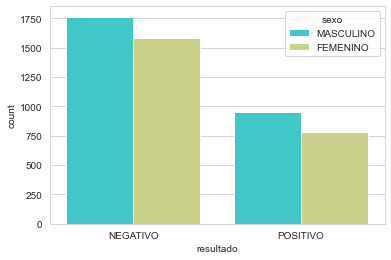

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='resultado',hue='sexo',data=df_cov,palette='rainbow')

Con un histograma podemos ver como fluctuan las edades de los pacientes

Text(0.5, 0, 'edad')

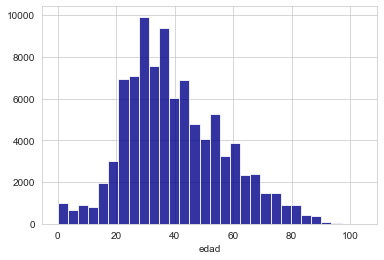

In [10]:
sns.set_style('whitegrid')
df_cov['edad'].hist(bins=30,color='darkblue',alpha=0.8)
plt.xlabel('edad')

También podemos ver las edades que tuvieron más positivos

Text(0.5, 0, 'edad')

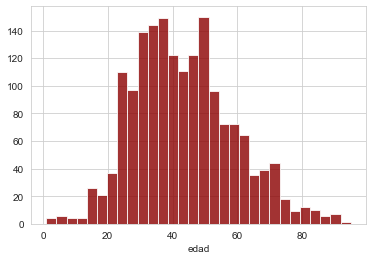

In [11]:
sns.set_style('whitegrid')
df_cov[df_cov['resultado']=='POSITIVO']['edad'].hist(bins=30,color='darkred',alpha=0.8)
plt.xlabel('edad')

## LIMPIEZA DE DATOS
Primero visualizamos todas las columnas y observamos que existen algunas que cuentan con datos nulos, por eso serán eliminadas.

In [12]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93774 entries, 0 to 93773
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  93774 non-null  int64 
 1   edad                93774 non-null  int64 
 2   sexo                93774 non-null  object
 3   fecha_ini           93774 non-null  object
 4   hospitalizado       93774 non-null  object
 5   evolucion           10054 non-null  object
 6   fiebre              93774 non-null  int64 
 7   malestar            93774 non-null  int64 
 8   tos                 93774 non-null  int64 
 9   garganta            93774 non-null  int64 
 10  congestion          93774 non-null  int64 
 11  respiratoria        93774 non-null  int64 
 12  diarrea             93774 non-null  int64 
 13  nauseas             93774 non-null  int64 
 14  cefalea             93774 non-null  int64 
 15  irritabilidad       93774 non-null  int64 
 16  muscular            93

**Se eliminaran las columnas de id, fecha_ini, hospitalizado, evolucion, otros_sintomas, otros_signos, otros_comorbilidad, fecha_mue, muestra y prueba**

In [13]:
df_cov.drop(['id','fecha_ini','hospitalizado','evolucion','otros_sintomas',
             'otros_signos','otros_comorbilidad','fecha_mue','muestra','prueba',], axis = 'columns', inplace=True)

In [14]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93774 entries, 0 to 93773
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   edad               93774 non-null  int64 
 1   sexo               93774 non-null  object
 2   fiebre             93774 non-null  int64 
 3   malestar           93774 non-null  int64 
 4   tos                93774 non-null  int64 
 5   garganta           93774 non-null  int64 
 6   congestion         93774 non-null  int64 
 7   respiratoria       93774 non-null  int64 
 8   diarrea            93774 non-null  int64 
 9   nauseas            93774 non-null  int64 
 10  cefalea            93774 non-null  int64 
 11  irritabilidad      93774 non-null  int64 
 12  muscular           93774 non-null  int64 
 13  abdominal          93774 non-null  int64 
 14  pecho              93774 non-null  int64 
 15  articulaciones     93774 non-null  int64 
 16  temperatura        93774 non-null  int64

In [15]:
df_cov.head()

,edad,sexo,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,...,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,resultado
0,40,MASCULINO,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,18,FEMENINO,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,45,MASCULINO,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVO
3,69,MASCULINO,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,67,FEMENINO,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,NEGATIVO


In [16]:
df_cov.dropna(inplace=True)

In [17]:
df_cov.head()

,edad,sexo,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,...,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,resultado
2,45,MASCULINO,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVO
4,67,FEMENINO,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,NEGATIVO
6,61,MASCULINO,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,POSITIVO
8,13,MASCULINO,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVO
9,78,MASCULINO,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVO


## Conversión de características categóricas

Se convertirán a valores binarios las columnas sexo y resultado. 
Se muestran las columnas originales y luego ya convertidas

In [18]:
sexo = pd.get_dummies(df_cov['sexo'],drop_first=True)
resultado = pd.get_dummies(df_cov['resultado'],drop_first=True)
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075 entries, 2 to 93730
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   edad               5075 non-null   int64 
 1   sexo               5075 non-null   object
 2   fiebre             5075 non-null   int64 
 3   malestar           5075 non-null   int64 
 4   tos                5075 non-null   int64 
 5   garganta           5075 non-null   int64 
 6   congestion         5075 non-null   int64 
 7   respiratoria       5075 non-null   int64 
 8   diarrea            5075 non-null   int64 
 9   nauseas            5075 non-null   int64 
 10  cefalea            5075 non-null   int64 
 11  irritabilidad      5075 non-null   int64 
 12  muscular           5075 non-null   int64 
 13  abdominal          5075 non-null   int64 
 14  pecho              5075 non-null   int64 
 15  articulaciones     5075 non-null   int64 
 16  temperatura        5075 non-null   int64 

In [19]:
df_cov.drop(['sexo','resultado'],axis=1,inplace=True)
df_cov = pd.concat([df_cov,sexo,resultado],axis=1)
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5075 entries, 2 to 93730
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   edad               5075 non-null   int64
 1   fiebre             5075 non-null   int64
 2   malestar           5075 non-null   int64
 3   tos                5075 non-null   int64
 4   garganta           5075 non-null   int64
 5   congestion         5075 non-null   int64
 6   respiratoria       5075 non-null   int64
 7   diarrea            5075 non-null   int64
 8   nauseas            5075 non-null   int64
 9   cefalea            5075 non-null   int64
 10  irritabilidad      5075 non-null   int64
 11  muscular           5075 non-null   int64
 12  abdominal          5075 non-null   int64
 13  pecho              5075 non-null   int64
 14  articulaciones     5075 non-null   int64
 15  temperatura        5075 non-null   int64
 16  exudado            5075 non-null   int64
 17  conjuntival  

In [20]:
df_cov.head()

,edad,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,cefalea,...,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,MASCULINO,POSITIVO
2,45,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,67,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6,61,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
8,13,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,78,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# APLICANDO LOS MODELOS DE CLASIFICACIÓN
Se usarán 4 modelos de clasificación:
1. Regresión Logística
2. K vecinos más cercanos
3. Árboles de Decisión y Bosques Aleatorios
4. Máquinas de Vectores de Soporte

## Regresión Logística

### Construcción del modelo de Regresión Logística
Comencemos dividiendo nuestros datos en un conjunto de entrenamiento y un conjunto de pruebas
#### División de datos de entrenamiento y prueba

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_cov.drop('POSITIVO',axis=1), 
                                                    df_cov['POSITIVO'], test_size=0.3, 
                                                    random_state=100)

### Entrenamiento y predicción

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression(max_iter=10000,solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [25]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Evaluación
¡Podemos verificar la exectitud, precisión, recuperación, puntaje f1 usando el informe de clasificación!

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test,predictions)

array([[881, 117],
       [330, 195]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       998
           1       0.62      0.37      0.47       525

    accuracy                           0.71      1523
   macro avg       0.68      0.63      0.63      1523
weighted avg       0.69      0.71      0.68      1523



**Usando el modelo de regresión logística se obtiene un acurracy de 71%, teniendo una precision del 62% para detectar los casos positivos y 73% para los casos negativos**

## K vecinos más cercanos

### Uso de KNN (K vecinos más cercanos)
Comenzaremos con k = 1 y luego con el método del codo encontraremos un k más optimo

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predicciones y Evaluaciones


In [33]:
pred = knn.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,pred))

[[766 232]
 [330 195]]


In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       998
           1       0.46      0.37      0.41       525

    accuracy                           0.63      1523
   macro avg       0.58      0.57      0.57      1523
weighted avg       0.62      0.63      0.62      1523



**Con un k=1 se obtiene un accuracy de 62%, teniendo una precision del 43% para detectar los casos positivos y 69% para detectar los casos negativos**

### Elegimos un valor K
¡Usemos el método del codo para elegir un buen valor K!

In [37]:
tasa_error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de Error')

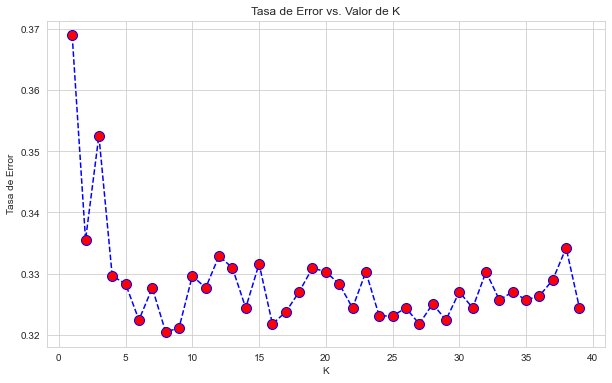

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

In [39]:
# CON K=14
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=14')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=14


[[946  52]
 [442  83]]


              precision    recall  f1-score   support

           0       0.68      0.95      0.79       998
           1       0.61      0.16      0.25       525

    accuracy                           0.68      1523
   macro avg       0.65      0.55      0.52      1523
weighted avg       0.66      0.68      0.61      1523



**Con un k=14 se obtiene un accuracy de 68%, teniendo una precision del 64% para detectar los casos positivos y 68% para detectar los casos negativos**

## Árboles de decisión y bosques aleatorios

Comenzaremos simplemente entrenando un solo árbol de decisión.

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=101)

In [42]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

### Predicción y Evaluación¶
Evaluemos nuestro árbol de decisiones.

In [43]:
predictions = dtree.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_test,predictions))

[[742 256]
 [305 220]]


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       998
           1       0.46      0.42      0.44       525

    accuracy                           0.63      1523
   macro avg       0.59      0.58      0.58      1523
weighted avg       0.62      0.63      0.63      1523



**Aplicando un árbol de decisión obtenemos un accuracy de 63%, teniendo una precision del 46% para detectar los casos positivos y 71% para detectar los casos negativos**

### Bosques Aleatorios

Ahora implementemos un modelo de bosque aleatorio.

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000,random_state=100,criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=100)

In [48]:
rfc_pred = rfc.predict(X_test)

In [49]:
print(confusion_matrix(y_test,rfc_pred))

[[779 219]
 [291 234]]


In [50]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       998
           1       0.52      0.45      0.48       525

    accuracy                           0.67      1523
   macro avg       0.62      0.61      0.62      1523
weighted avg       0.66      0.67      0.66      1523



**Aplicando Bosques Aleatorios obtenemos un accuracy de 67%, teniendo una precision del 52% para detectar los casos positivos y 73% para detectar los casos negativos**

## Máquinas con Vectores de Soporte


### Entrenar el clasificador con Vectores de Soporte

In [51]:
from sklearn.svm import SVC

In [52]:
model = SVC(C=1000,kernel="linear",gamma=0.001)

In [53]:
model.fit(X_train,y_train)

SVC(C=1000, gamma=0.001, kernel='linear')

### Predicciones y evaluaciones

Ahora vamos a predecir haciendo uso del modelo entrenado.

In [54]:
predictions = model.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(confusion_matrix(y_test,predictions))

[[804 194]
 [298 227]]


In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       998
           1       0.54      0.43      0.48       525

    accuracy                           0.68      1523
   macro avg       0.63      0.62      0.62      1523
weighted avg       0.66      0.68      0.67      1523



**Aplicando un modelo de Máquinas con vectores de soporte y entrenandolo con parámetros como un kernel del tipo "linear" obtenemos un accuracy de 68%, teniendo una precision del 54% para detectar los casos positivos y 73% para detectar los casos negativos**

### Gridsearch
Usamos el método Gridsearch para encontrar los parámetros correctos (como qué valores de C o gamma usar) 

In [58]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [61]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.661, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.660, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.661, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.661, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.661, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.661, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.660, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.661, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.661, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.688, total=   1.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.699, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.666, total=   0.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.693, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.690, total=   0.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.689, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.693, total=   0.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.680, total=   4.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.692, total=   3.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.702, total=   1.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.710, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.673, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.680, total=   1.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.683, total=   1.5s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.2min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [62]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [63]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [64]:
grid_predictions = grid.predict(X_test)

In [65]:
print(confusion_matrix(y_test,grid_predictions))

[[902  96]
 [375 150]]


In [66]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       998
           1       0.61      0.29      0.39       525

    accuracy                           0.69      1523
   macro avg       0.66      0.59      0.59      1523
weighted avg       0.67      0.69      0.65      1523



**Aplicando un modelo de Máquinas con vectores de soporte empleando el método gridsearch obtenemos un accuracy de 69%, teniendo una precision del 61% para detectar los casos positivos y 71% para detectar los casos negativos**

### Se concluye que es preferible usar el modelo de clasificación de Regresión Logística puesto que consigue el accuracy más alto con un valor de 71% y ser uno de los mejores modelos en detectar los casos negativos con un 73% de precision, a pesar de que el modelo KNN detecta mejor los positivos con un 64% de precision

## Aplicando CLUSTERING

### Agrupamiento mediante K Means 
Al ser K Means un modelo no supervisado debemos eliminar del dataframe la etiqueta del resultado, en este caso sería la columna "POSITIVO"

In [67]:
df = df_cov.drop(["POSITIVO"],axis=1)

Convertimos el dataframe a un arreglo usando el método to_numpy()

In [68]:
arreglo = df.to_numpy()
arreglo

array([[45,  0,  1, ...,  0,  0,  1],
       [67,  1,  1, ...,  0,  0,  0],
       [61,  0,  0, ...,  0,  0,  1],
       ...,
       [37,  0,  0, ...,  0,  0,  1],
       [28,  0,  0, ...,  0,  0,  1],
       [27,  0,  0, ...,  0,  0,  1]], dtype=int64)

### Creación de Clústeres

In [69]:
from sklearn.cluster import KMeans

In [70]:
kmeans = KMeans(n_clusters=2)

In [71]:
kmeans.fit(arreglo)

KMeans(n_clusters=2)

In [72]:
kmeans.cluster_centers_

array([[4.09556475e+01, 2.63749261e-01, 3.04947763e-01, 4.30711610e-01,
        4.63433866e-01, 2.08555096e-01, 1.19258821e-01, 8.16085157e-02,
        5.10546028e-02, 3.07116105e-01, 9.65897891e-03, 1.33648729e-01,
        2.12891780e-02, 1.28917800e-01, 3.23280110e-02, 2.90498719e+01,
        2.83855707e-02, 4.92805046e-03, 5.91366056e-04, 3.94244037e-04,
        1.28129312e-02, 1.59668835e-02, 1.26158092e-02, 1.28129312e-02,
        2.20776661e-02, 9.85610093e-04, 2.12891780e-02, 1.61640055e-02,
        9.85610093e-04, 9.85610093e-04, 1.37985413e-03, 2.95683028e-03,
        0.00000000e+00, 5.91366056e-03, 4.53380643e-03, 5.34594914e-01],
       [3.65000000e+01, 0.00000000e+00, 0.00000000e+00, 5.00000000e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.00000000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.00000000e-01, 0.00000000e+00, 3.65550000e+03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [73]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

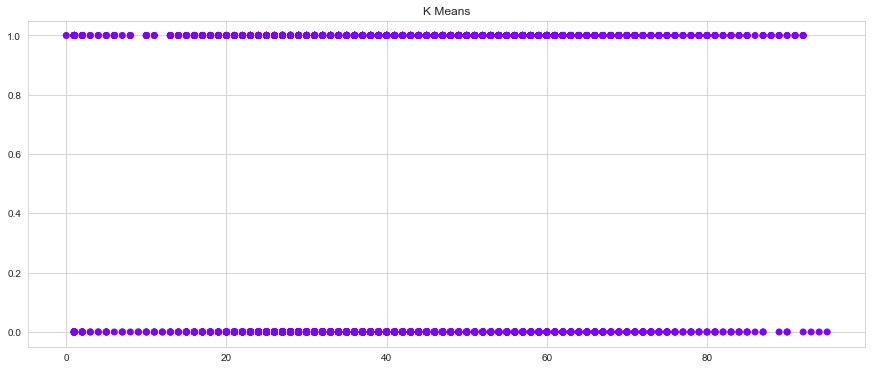

In [74]:
f, ax1 = plt.subplots(figsize=(15, 6))
ax1.set_title('K Means')
ax1.scatter(arreglo[:,0],arreglo[:,35],c=kmeans.labels_,cmap='rainbow')

### Evaluamos como el modelo lo ha agrupado

In [75]:
import collections

In [76]:
collections.Counter(kmeans.labels_)

Counter({0: 5073, 1: 2})

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(confusion_matrix(df_cov["POSITIVO"], kmeans.labels_))

[[3342    2]
 [1731    0]]


In [79]:
print(classification_report(df_cov["POSITIVO"], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79      3344
           1       0.00      0.00      0.00      1731

    accuracy                           0.66      5075
   macro avg       0.33      0.50      0.40      5075
weighted avg       0.43      0.66      0.52      5075



**Podemos ver que según el modelo tenemos un accuracy de 66%, teniendo un 66% de precision para identificar los casos negativos, sin embargo, la forma en como lo agrupo no funciona para identificar los casos positivos de covid-19**

### Probamos otra vez creando un cluster, pero esta vez con los datos estandarizados

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [106]:
scaler.fit(df)

StandardScaler()

In [107]:
scaled_features = scaler.transform(df)

In [108]:
data_scaled = pd.DataFrame(scaled_features,columns=df.columns)
data_scaled.head()

,edad,fiebre,malestar,tos,garganta,congestion,respiratoria,diarrea,nauseas,cefalea,...,cardiovascular,diabetes,hepatica,neurologica,inmunodeficiencia,renal,hepatico,pulmonar,cancer,MASCULINO
0,0.256237,-0.598365,1.510147,-0.869864,-0.929752,1.948534,-0.367895,-0.298030,-0.231903,-0.665884,...,-0.147457,-0.128152,-0.031404,-0.031404,-0.037165,-0.054447,0.0,-0.077113,-0.067473,0.933072
1,1.649480,1.671219,1.510147,1.149605,-0.929752,-0.513206,-0.367895,-0.298030,-0.231903,1.501763,...,6.781647,7.803220,-0.031404,-0.031404,-0.037165,-0.054447,0.0,-0.077113,-0.067473,-1.071729
2,1.269505,-0.598365,-0.662187,1.149605,-0.929752,1.948534,-0.367895,3.355362,-0.231903,-0.665884,...,-0.147457,-0.128152,-0.031404,-0.031404,-0.037165,-0.054447,0.0,-0.077113,-0.067473,0.933072
3,-1.770299,-0.598365,1.510147,1.149605,1.075556,1.948534,-0.367895,-0.298030,-0.231903,-0.665884,...,-0.147457,-0.128152,-0.031404,-0.031404,-0.037165,-0.054447,0.0,-0.077113,-0.067473,0.933072
4,2.346102,-0.598365,-0.662187,1.149605,1.075556,1.948534,-0.367895,-0.298030,-0.231903,-0.665884,...,-0.147457,-0.128152,-0.031404,-0.031404,-0.037165,-0.054447,0.0,-0.077113,-0.067473,0.933072


In [109]:
arreglo2 = data_scaled.to_numpy()

In [110]:
kmeans2 = KMeans(n_clusters=2)

In [111]:
kmeans2.fit(arreglo2)

KMeans(n_clusters=2)

In [112]:
kmeans2.cluster_centers_

array([[-0.10734497, -0.50491673, -0.5252984 , -0.57775309, -0.45373327,
        -0.26112681, -0.27066144, -0.23262778, -0.19448349, -0.4361585 ,
        -0.08409267, -0.34005911, -0.11024356, -0.28777509, -0.17261796,
        -0.0762071 , -0.12991848, -0.07035975, -0.00959001, -0.01985558,
        -0.08206249, -0.11878489, -0.09376136,  0.04848648,  0.02761925,
         0.0142458 , -0.05566415, -0.05431918, -0.01999134, -0.00857896,
         0.00142378, -0.04125566,  0.        , -0.04441914, -0.04082075,
         0.08033163],
       [ 0.13138234,  0.61798091,  0.64292657,  0.70712725,  0.55533612,
         0.31959999,  0.33126968,  0.28471928,  0.23803347,  0.5338259 ,
         0.10292324,  0.41620731,  0.13493001,  0.35221552,  0.21127168,
         0.09327187,  0.15901065,  0.08611516,  0.01173746,  0.02430177,
         0.10043844,  0.14538396,  0.114757  , -0.05934388, -0.03380393,
        -0.0174358 ,  0.06812883,  0.06648268,  0.02446792,  0.01050002,
        -0.0017426 ,  0.05049

In [113]:
kmeans2.labels_

array([0, 1, 1, ..., 0, 0, 0])

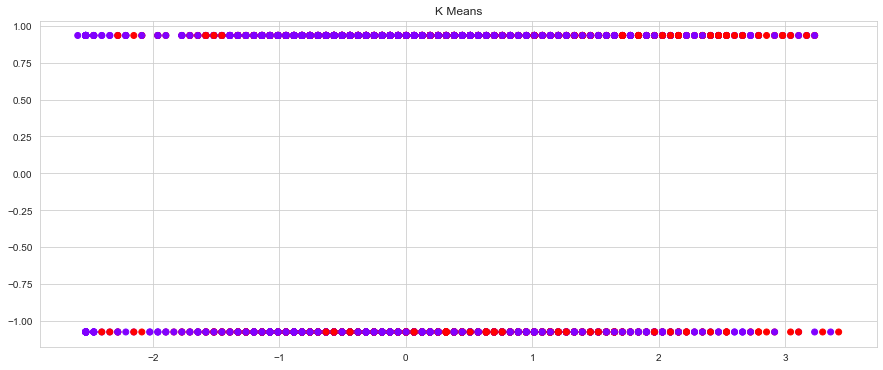

In [114]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title('K Means')
ax.scatter(arreglo2[:,0],arreglo2[:,35],c=kmeans2.labels_,cmap='rainbow')

### Evaluamos el nuevo cluster

In [115]:
collections.Counter(kmeans2.labels_)

Counter({0: 2786, 1: 2289})

In [116]:
print(confusion_matrix(df_cov['POSITIVO'], kmeans2.labels_))

[[2143 1201]
 [ 643 1088]]


In [117]:
print(classification_report(df_cov['POSITIVO'], kmeans2.labels_))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      3344
           1       0.48      0.63      0.54      1731

    accuracy                           0.64      5075
   macro avg       0.62      0.63      0.62      5075
weighted avg       0.67      0.64      0.65      5075



**Según la nueva agrupación de los datos que hemos obtenido, el modelo tiene un accuracy de 63% , teniendo una mejora en la precision que llega al 77% para identificar los casos negativos, asi como ya puede identificar los casos positivos pero con poca precision siendo esta de solo 47%**